#  Classification of Music Lyrics by Genre


__`MIDS w266: Natural Language Processing and Deep Learning | UC Berkeley School of Information | Summer 2019`__

_Team members_

  - __Dan Price__, danprice@ischool.berkeley.edu
  - __Shiraz Chakraverty__, schakraverty@berkeley.edu

  
## Table of Contents

[1.Abstract](#1.-Abstract)

[2.Introduction](#2.-Introduction)

[3.Background](#3.-Background)

[3.EDA and discussion of challenges](#3.-EDA-and-discussion-of-challenges)

[4.Methods (design and implementation)](#4.-Methods)

[5. Application of New Concepts](#5.-Application-of-New-Concepts)

[References](#6.-References)

__Please render this notebook with `jupyter` or `nbviewer`. The github notebook viewer does not render all equations correctly.__

# 1. Abstract


"CD sales are plummeting, and vinyl sales have plateaued after rising to their greatest peak since the 1990s, but that doesn't mean that people have stopped listening to music. With the rise of streaming music, people are listening as much as ever, in their homes, offices, or any other location where their devices can connect to the internet." - Says PCMag<sup>[1]</sup>

Spotify<sup>[2]</sup>, happens to have total market share of over $25 Billion, and is one of the leaders in the music streaming space today. It has millions of songs in its database and claims at its core that it has the right music for everyone. They have invested a lot in research, especially NLP methods, starting with classification of the music based on many factors including tempo, acoustics, energy, danceability etc. to answer that most important and stressful first impression question: What is your favorite type of music?

Companies like spotify are surviving based on more and more nuanced music classification, either to be able to place the right recommendations to their customers or simply as a product (for example Shazam). Thus finding out at scale, the music genres is the most fundamental step in moving towards a personal listening experience.

# 2. Introduction

Various academic and industry teams have tried approaches to this space. Efforts to understand music, both sonically and semantically through lyrics and metadata, have coalesced in a subfield known as Music Information Retrieval (MIR). No single effort has been very successful in finding a stable method which performs significantly well to tackle the lyrical genre classification problem. SVM, KNN and Naive Bayes have all been used in lyrical classification but they all have very low accuracy. We would like to explore the application of new and emerging models to the task.

In the field of Natural Language Processing, the classification of music genres based on lyrics is a challenging task. Machine understanding of language in general is complex. We cannot yet fully understand how the human brain does it but many strides have been made. With that understanding, newer and emerging algorithms and word embeddings are able to offer classifications useful for organizations doing language tasks at a large scale. 

We would like to explore advantages and disadvantages of several methods in papers we have selected and report our observations, learnings and a recommendation. With the focus of deep learning, it is clear that Neural Networks tend to work better than previously used models. We would like to explore this path and provide some comparative analysis. 

The dataset for this problem is hard to come by  due to copyright and other original content protection requirements. The search for more examples continues, in the meantime we have we found a data set in Kaggle which is suitable to get started with model development.

The initial dataset is downloadable as a comma delimited file. The columns in the file are as follows:
`index,song,year,artist,genre,lyrics`
    
We are particularly interested in the text in the lyrics column. However, we may find ways to utilize other columns as features. The lyrics are a string with carriage returns denoting an end of line. Statistics specific to the overall structure of the lyrics, such as line length, may add value to the classification task.

# 3. EDA and discussion of challenges

After processing the lyrics we analysed the data and identified the features. One of the main problems with this challange is that many song lyrics get mistaken with a genre that they don't belong to. In this experiment, the goal was to build a classifier able to classify lyrics into distinct categories, Algorithms able to identify  lyrics are obviously useful to maybe filter its access to specific audience. As Christian music examples exist in all the major popular music styles (from pop to heavy metal), it is a good example of kind of songs that can benefit from such an algorithm, the most obvious way of identifying Christian music is by the lyrics.

While linear and kernel models rely on good hand selected features, deep learning architectures attempt to prevent this by letting the model learn important features themselves. However, not much research has looked into the performance of these deep learning methods with respect to the genre classification task on lyrics. Here, we attempt to understand this situation by extending the deep learning ideas on text classification to the particular
case of lyrics. Previous non-neural lyrical classifiers struggled to achieve a classification accuracy any higher than 50%. We can see evidence of this here.

We used Spark to analyse the data and visualized the data. This analysis helped us understand the features of the data that would be most useful for the task in our hand. We evaluated the average length of lyrics in each genre, and we had an interesting insight, Hip-Hop songs were longer as compared to the other genres. And the rest of the genres had almost similar lengths. 

An important idea in NLP is the use of dense vectors to represent words. To learn these word vectors a variety of methods have been proposed. A successful methodology proposes that similar words have similar context and thus that these vectors should be learnt through their context, such as in the word2vec model propose the GloVe method
which combines global matrix factorisation and local context window. We tried using this method and did not find a major improvement.

## Notebook Set-Up

The following setup demonstrates two distinct yet valuable approaches. We have used the RDD API as well as the Spark 2.0 DataFrame and ML API in this project. The following are the setup elements, in brief:

(1) Python and Spark libraries - 

`NumPy` Provides
,
  1. An array object of arbitrary homogeneous items
  2. Fast mathematical operations over arrays
  3. Linear Algebra, Fourier Transforms, Random Number Generation

`Pandas` Provides,

  1. Intelligent label-based slicing, fancy indexing, and subsetting of large data sets.
  2. Intuitive merging and joining data sets.
  3. Flexible reshaping and pivoting of data sets.

`Matplotlib` Provides a MATLAB-like way of plotting. `pyplot` is mainly intended for interactive plots and simple cases of programmatic
plot generation::

`SparkSession` is the entry point to programming Spark with the Dataset and DataFrame API. A SparkSession can be used create `DataFrame` as tables, execute SQL over tables, cache tables, and read parquet files.

For brevity, we will not list out all the libraries and their functions, this can be easily requested by executing `[name of library]??`

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()


In [3]:
from __future__ import print_function

# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import time
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import csv
import os
import sys
from tabulate import tabulate
import seaborn as sns
from nltk.corpus import wordnet
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import svm
#from nltk.stem.porter import *
from stemming.porter2 import stem
from sklearn.metrics import confusion_matrix
import sys
from sklearn.pipeline import Pipeline
import pickle
from sklearn.externals import joblib
from sklearn import preprocessing
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D, Flatten, Dropout
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from keras import optimizers
from gensim.models.word2vec import Word2Vec
from collections import Counter, defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


In [29]:
!wget https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
!unzip uncased_L-12_H-768_A-12.zip
!ls 'uncased_L-12_H-768_A-12'

--2019-07-28 19:48:27--  https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.200.128, 2607:f8b0:4001:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 407727028 (389M) [application/zip]
Saving to: ‘uncased_L-12_H-768_A-12.zip.1’

uncased_L-12_H-768_ 100%[===================>] 388.84M   279MB/s    in 1.4s    

2019-07-28 19:48:28 (279 MB/s) - ‘uncased_L-12_H-768_A-12.zip.1’ saved [407727028/407727028]

Archive:  uncased_L-12_H-768_A-12.zip
   creating: uncased_L-12_H-768_A-12/
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.meta  
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.data-00000-of-00001  
  inflating: uncased_L-12_H-768_A-12/vocab.txt  
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.index  
  inflating: uncased_L-12_H-768_A-12/bert_config.json  
bert_config

In [18]:
## must install following libraries
## pip install bert-tensorflow
## pip install tensorflow_hub
## verify these are installed before
## proceeding to using the BERT library
from datetime import datetime
import bert
from bert import run_classifier
from bert import optimization
from bert import tokenization
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
VOCAB_FILE= "uncased_L-12_H-768_A-12/vocab.txt"
INIT_CHECKPOINT = "uncased_L-12_H-768_A-12/bert_model.ckpt"
CONFIG_FILE = "uncased_L-12_H-768_A-12/bert_config.json"

In [5]:
import os
import time
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
import math
from sklearn.model_selection import train_test_split
from sklearn import metrics

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, CuDNNLSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D, GlobalMaxPooling1D, GlobalAveragePooling1D
from keras.layers import Input, Embedding, Dense, Conv2D, MaxPool2D, concatenate
from keras.layers import Reshape, Flatten, Concatenate, Dropout, SpatialDropout1D
from keras.optimizers import Adam
from keras.models import Model
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints, optimizers, layers


from keras.layers import *
from keras.models import *
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.initializers import *
from keras.optimizers import *
import keras.backend as K
from keras.callbacks import *
import tensorflow as tf
import os
import time
import gc
import re
import glob

In [2]:
%reload_ext autoreload
%autoreload 2

In [13]:
# store path to notebook
PWD = !pwd
PWD = PWD[0]

(1) Create a storage directory, download and extract the tarball. This section below is to capture the data we have been provided. In production, we will likely grep this from a kafka stream dumping files into a hdfs storage location from where we can safely load the data into our Spark clusters. However before doing these, we still need to capture these files, and be able to perform some basic operations prior to using the Spark application.

In [5]:
#copy file from bucket
!gsutil -m cp gs://266-schakraverty/lyrics.tar .

Copying gs://266-schakraverty/lyrics.tar...
- [1/1 files][309.6 MiB/309.6 MiB] 100% Done                                    
Operation completed over 1 objects/309.6 MiB.                                    


In [7]:
# Run Once - In production, this will move to the data pipeline
# make a data folder & download zipped datafile
#!mkdir data
#!gunzip data/lyrics.tar.gz
!tar -xvf lyrics.tar
#!cp lyrics.csv data/lyrics.csv

./._lyrics.csv
lyrics.csv


(2) Count the total size of the dataset.

In [5]:
#Count the number of records in the raw data
!wc -l lyrics.csv

9357041 lyrics.csv


In [4]:
lyrics_sample = pd.read_csv('lyrics.csv')
print('Number of Records:',len(lyrics_sample))

Number of Records: 362237


__Skewed Distribution of Classes__

The original dataset includes disproportionate representation of genres. The Rock genre comprises nearly one-third of the dataset with over 100,000 records. The least populated genre is folk with just over 2000 records. Due to the skewed distribution of classes, we sampled 1000 records from seven genres.

In [5]:
lyrics_sample = lyrics_sample.drop(lyrics_sample[lyrics_sample.genre == 'Not Available'].index)
lyrics_sample = lyrics_sample.drop(lyrics_sample[lyrics_sample.genre == 'Other'].index)
lyrics_sample['genre'].value_counts()

Rock          131377
Pop            49444
Hip-Hop        33965
Metal          28408
Country        17286
Jazz           17147
Electronic     16205
R&B             5935
Indie           5732
Folk            3241
Name: genre, dtype: int64

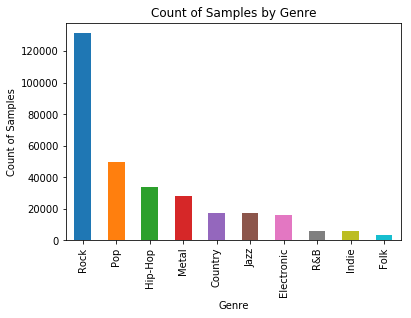

In [6]:
plot = lyrics_sample['genre'].value_counts().plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Count of Samples')
plt.title('Count of Samples by Genre')
plt.show()

__Word Count__

Statistics specific to the overall structure of the lyrics, such as number of words, add value to the classification task. The dataset includes lyrics of varying word counts. The word counts translate to the length of the sequences that we feed our models. We opted to only sample lyrics with at least 100 words. The average word count for the Hip-Hop genre in comparison to the other genres may deserve some attention but we consider it outside the scope of this work.

In [7]:
lyrics_sample['word_count'] = lyrics_sample['lyrics'].str.split( ).str.len()
lyrics_sample.word_count.describe()

count    237427.000000
mean        228.906514
std         160.012144
min           1.000000
25%         130.000000
50%         192.000000
75%         279.000000
max        8195.000000
Name: word_count, dtype: float64

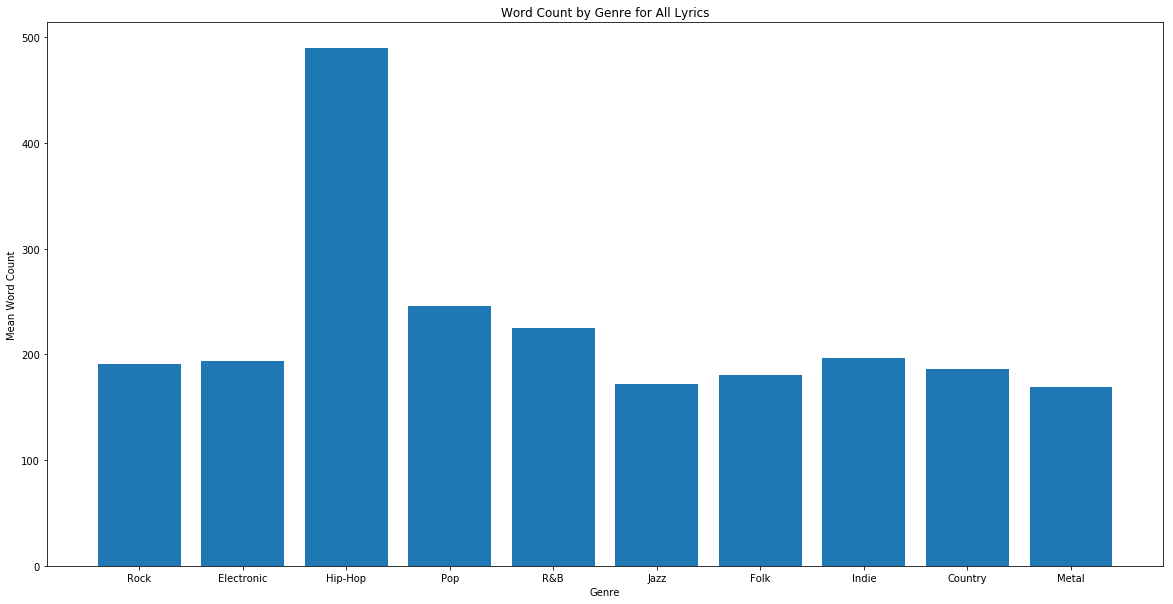

In [10]:
dict_genres={genre:index for index,genre in enumerate(lyrics_sample.genre.value_counts().keys())}
genre_means = [(genre,lyrics_sample[lyrics_sample['genre'] == genre].word_count.mean()) for genre in dict_genres.keys()]   
genres = [genre for (genre,mean) in genre_means]
means = [mean for (genre,mean) in genre_means]
plt.bar(genres,means)
plt.xticks(genres)
plt.xlabel('Genre')
plt.ylabel('Mean Word Count')
plt.title('Word Count by Genre for All Lyrics')
plt.rcParams["figure.figsize"] = [30,15]
plt.show()

(3) Preprocessing the dataset - Perform a list of preprocessing steps. Each step is described below with comments

In [10]:
#Pre-processing
def data_cleanup():

#Cleaning up the data
    with open('lyrics.csv', 'r') as inp, open('lyrics_out.csv', 'w') as out:
        writer = csv.writer(out)
        for row in csv.reader(inp):
            writer.writerow(row)

def multi_class_data():
	data_cleanup()

	df = pd.read_csv('lyrics_out.csv')

	#add a new column with word count of the lyrics of a song
	df['word_count'] = df['lyrics'].str.split( ).str.len()

	df["lyrics"] = df['lyrics'].str.lower()

	#remove rows with lyrics count less than 100

	#df = df[df['genre']!="Pop"]
	df = df[df['genre']!="Folk"]
	#df = df[df['genre']!="Jazz"]
	df = df[df['genre']!="R&B"]
	df = df[df['genre']!="Indie"]
	df = df[df['genre']!="Electronic"]
	df = df[df['genre']!="Metal"]

	df = df[df['word_count'] > 100]

	df = df.groupby('genre').head(1000)
	#replace carriage returns
	df = df.replace({'\n': ' '}, regex=True)

	del df['song'],df['year'],df['artist'],df['word_count']
	print (df.head())

	df.to_csv('lyrics_final.csv', index=False)

In [11]:
start = time.time()
multi_class_data()
end = time.time()
print("completed job in:",end - start,"seconds")

   index genre                                             lyrics
0      0   Pop  oh baby, how you doing? you know i'm gonna cut...
1      1   Pop  playin' everything so easy, it's like you seem...
2      2   Pop  if you search for tenderness it isn't hard to ...
3      3   Pop  oh oh oh i, oh oh oh i [verse 1:] if i wrote a...
4      4   Pop  party the people, the people the party it's po...
completed job in: 28.995556116104126 seconds


__explain what is being done above]__

In [8]:
def pre_process():

	print("Processing the data...")
	df = pd.read_csv('lyrics_final.csv')
	df.replace('?', -9999999, inplace=True)

	df.drop(['index'],1, inplace=True)
	
	#dict_genres={'Rock':1, 'Country':2, 'Hip-Hop':3, 'Pop':4, 'Jazz':5}
    
	dict_genres={genre:index for index,genre in enumerate(df.genre.value_counts().keys())}
    
	labels = []
	text = []
	for index, row in df.iterrows():
		labels.append(row[0])
		words = row[1].split()
		text.append(row[1])
		#text.append(words)
	#stemming
	text = [[stem(word) for word in sentence.split(" ")] for sentence in text]
	text = [" ".join(sentence) for sentence in text]

	print("Data processing done!!")
	return text,labels,dict_genres


def build_dataset(text,labels):
	#text, labels = pre_process()
	
	print("Total songs: %s"%(len(labels)))
	countVec = TfidfVectorizer(stop_words = 'english', sublinear_tf=True)

	#countVec = CountVectorizer(stop_words = 'english')

	x_train, x_test, y_train, y_test = train_test_split(text,labels,test_size=0.2)

	#Creating tf-idf vector for the documents

	x_trainCV = countVec.fit_transform(x_train)
	joblib.dump(countVec, "tfidf_vectorizer.pickle")

	x_testCV = countVec.transform(x_test)

    
	x_train = x_trainCV.toarray()
	x_test = x_testCV.toarray()

	x_train = preprocessing.normalize(x_train)
	x_train = preprocessing.scale(x_train)
	
	x_test = preprocessing.normalize(x_test)
	x_test = preprocessing.scale(x_test)
    
    
	joblib.dump(countVec, "tfidf_vectorizer.pickle")

	print("x_train: %s, x_test: %s, y_train: %s, y_test: %s"%(len(x_train),len(x_test),len(y_train),len(y_test)))	
	return x_train,x_test,y_train,y_test

def train(input1,x_train,x_test,y_train,y_test):
	f = open("multiclass.txt", "w")
	if input1 == "bnb":
		print("Bernoulli Naive Bayes Classifier")
		bnb = BernoulliNB()
		bnb.fit(x_train,y_train)
		accuracy = bnb.score(x_test,y_test)
		print("accuracy for bernoulli naive bayes: %s"%(accuracy))
		f.write("accuracy for bernoulli naive bayes: %s \n"%(accuracy))
	
	if input1 == "dt":
		print("Decision Tree Classifier")
		dt = DecisionTreeClassifier()
		dt.fit(x_train,y_train)
		accuracy = dt.score(x_test,y_test)
		print("accuracy for Decision Tree: %s"%(dt.score(x_test,y_test)))
		f.write("accuracy for decision tree: %s \n"%(accuracy))
	
	if input1 == "mlp":
		print("Multi Layer Perceptron Classifier")
		#Training and Testing on SCikit Neural Network library
		neural = MLPClassifier()
		neural.fit(x_train,y_train)

		joblib.dump(neural, "classifier.pickle")

		accuracy = neural.score(x_test, y_test)
		print("accuracy for Neural Network: %s"%(accuracy))
		
	if input1 == "rf":
		print("Random Forest Classifier")
		rf = RandomForestClassifier(n_estimators=100,max_features="sqrt").fit(x_train,y_train)
		joblib.dump(rf, "classifier.pickle")
		accuracy = rf.score(x_test, y_test)
		
		print("accuracy for Random Forest: %s"%(accuracy))
		f.write("accuracy for Random Forest: %s \n"%(accuracy))
	
	f.close()

def test(input_string):

	vectorizer = joblib.load("tfidf_vectorizer.pickle")
	classifier = joblib.load("classifier.pickle")
	
	tr = vectorizer.transform(input_string)

	predictions = classifier.predict(tr)
	print(predictions[0])
	return predictions[0]

In [9]:
# process the lyrics, convert into train and test
start = time.time()
text, labels, genre_dict = pre_process()
labels = labels[:len(text)]
print('text:',len(text),'labels:',len(labels))
end = time.time()
print("completed in :",end - start,"seconds")
print(genre_dict)

Processing the data...
Data processing done!!
text: 7000 labels: 7000
completed in : 34.700992822647095 seconds
{'Hip-Hop': 0, 'Pop': 1, 'Country': 4, 'Other': 3, 'Rock': 2, 'Jazz': 5, 'Not Available': 6}


In [10]:
start = time.time()
x_train, x_test, y_train, y_test = build_dataset(text, labels)
end = time.time()
print("completed in :",end - start,"seconds")

Total songs: 7000
x_train: 5600, x_test: 1400, y_train: 5600, y_test: 1400
completed in : 29.512710094451904 seconds


# 4. Methods

We have taken few different approaches to the problem, resulting in multiple models. In our main baseline approach we use term frequency and inverse document frequency as our feature vectors and the genre classes as our labels to identify. 

In order to demonstrate the baseline complexity, We developed Naive Bayes, Random Forest, Support Vector machine and Multi Layer Perceptron model to classify the songs into multiple classes. We have also normalized the vector after applying the Count Vectorizer and Tf-Idf Weighing scheme.

Word2Vec

Next, we used the word vectors (word2vec) to represent our lyrical text. These semantic style vectors preserve most of the relevant information in a text while having relatively low dimensionality. Word2vec is a group of related models that are used to produce word embeddings. These models are shallow, two-layer neural networks that are trained to reconstruct linguistic contexts of words. 

Word2vec takes as its input a large corpus of text and produces a vector space, typically of several hundred dimensions, with each unique word in the corpus being assigned a corresponding vector in the space. Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located in close proximity to one another in the space.

Word2vec was created by a team of researchers led by Tomas Mikolov at Google and patented. The algorithm has been subsequently analysed and explained by other researchers. Embedding vectors created using the Word2vec algorithm have many advantages compared to earlier algorithms such as latent semantic analysis. 

Naive Bayes: Implemented Bernoulli and Multinomial Naive Bayes, Support Vector Machine: Used the linear kernel, Logistic Regression, Decision Tree, Random Forest: Used 100 trees and the majority of all the classifications are the result, MultiLayer Perceptron Model: Experimented with various activation functions and hidden layers, Extra Trees Classifier: Used this algorithm to test with word2vec feature vectors: Used this algorithm to test with word2vec feature vectors. We decided to remove models that did not proove to be practically useful - either they took far too long to train or they performed very poorly.

We used a Convolutional Neural Network to classify the songs into their respective genres. We used pre-trained glove vectors for this model. The glove model we used is Google Glove 6B vector 100d. We have implemented 1 CNN models using Keras library: convolution model: layer is convoluted and maxpool layer.

As we have since learned that,

Context-free models such as word2vec or GloVe generate a single word embedding representation for each word in the vocabulary. For example, the word “bank” would have the same context-free representation in “bank account” and “bank of the river.”

Contextual models instead generate a representation of each word that is based on the other words in the sentence. Contextual representations can further be unidirectional or bidirectional. For example, in the sentence “I accessed the bank account,” a unidirectional contextual model would represent “bank” based on “I accessed the” but not “account.” However, BERT represents “bank” using both its previous and next context — “I accessed the … account” — starting from the very bottom of a deep neural network, making it deeply bidirectional.

Hence we decided to download a pre-trained BERT model and use for our multiclass classification problem.

__Baseline models__

In [72]:
input_param = ["bnb","dt","mlp","rf"]
for i in input_param:
    start = time.time()
    train(i,x_train,x_test,y_train,y_test)
    end = time.time()
    print("completed in:",end - start,"seconds")

Bernoulli Naive Bayes Classifier
accuracy for bernoulli naive bayes: 0.44785714285714284
completed in: 4.013340711593628 seconds
Decision Tree Classifier
accuracy for Decision Tree: 0.4007142857142857
completed in: 72.38715481758118 seconds
Multi Layer Perceptron Classifier
accuracy for Neural Network: 0.45714285714285713
completed in: 442.3939027786255 seconds
Random Forest Classifier
accuracy for Random Forest: 0.48142857142857143
completed in: 97.170969247818 seconds


__Method 2 - GloVe: Global Vectors for Word Representation with standard algorithms__

In [24]:
##start method 2
df = pd.read_csv('lyrics_final.csv')
!mkdir genres_data
!mkdir genres_data/pop
!mkdir genres_data/rock
!mkdir genres_data/jazz
!mkdir genres_data/country
!mkdir genres_data/hiphop

for index, row in df.iterrows():
	if row[1] == "Pop":
		with open("genres_data/pop/%s"%(row[0]), "a") as pop_file:
			pop_file.write(row[2])

	if row[1] == "Rock":
		with open("genres_data/rock/%s"%(row[0]), "a") as rock_file:
			rock_file.write(row[2])

	if row[1] == "Jazz":
		with open("genres_data/jazz/%s"%(row[0]), "a") as jazz_file:
			jazz_file.write(row[2])

	if row[1] == "Country":
		with open("genres_data/country/%s"%(row[0]), "a") as country_file:
			country_file.write(row[2])

	if row[1] == "Hip-Hop":
		with open("genres_data/hiphop/%s"%(row[0]), "a") as hiphop_file:
 			hiphop_file.write(row[2])

In [25]:
## Run ONCE ONLY - ONCE RUN, The Files will be saved for future peipeline

!wget http://nlp.stanford.edu/data/glove.6B.zip
!wget http://nlp.stanford.edu/data/glove.840B.300d.zip


/bin/sh: wget: command not found
/bin/sh: wget: command not found


In [43]:
## Also run ONCE when setting up a new Cluster.
!unzip glove.6B.zip
!unzip glove.840B.300d.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       
Archive:  glove.840B.300d.zip
  inflating: glove.840B.300d.txt     


In [17]:
# Song word to vector

GLOVE_6B_50D_PATH = "glove.6B.50d.txt"
GLOVE_840B_300D_PATH = "glove.840B.300d.txt"

f = open("multiclass.txt", "w")

df = pd.read_csv('lyrics_final.csv')
df.replace('?', -9999999, inplace=True)

df.drop(['index'],1, inplace=True)
labels = []
text = []

for index, row in df.iterrows():
    labels.append(row[0])
    words = row[1].split()
    text.append(words)

#print(labels)

X, y = np.array(text), np.array(labels)
print("total examples %s" % len(y))

with open(GLOVE_6B_50D_PATH, "rb") as lines:
    word2vec = {line.split()[0]: np.array(map(float, line.split()[1:]))
               for line in lines}

# reading glove files, this may take a while
# we're reading line by line and only saving vectors
# that correspond to words from our training set


glove_small = {}
all_words = set(w for words in X for w in words)
with open(GLOVE_6B_50D_PATH, "rb") as infile:
    for line in infile:
        parts = line.split()
        word = parts[0]
        nums = map(float, parts[1:])
        if word in all_words:
            glove_small[word] = np.array(nums)
            
glove_big = {}
with open(GLOVE_840B_300D_PATH, "rb") as infile:
    for line in infile:
        parts = line.split()
        word = parts[0]
        nums = map(float, parts[1:])
        if word in all_words:
            glove_big[word] = np.array(nums)

# train word2vec on all the texts - both training and test set
# we're not using test labels, just texts so this is fine
model = Word2Vec(X, size=100, window=5, min_count=5, workers=2)
w2v = {w: vec for w, vec in zip(model.wv.index2word, model.wv.syn0)}

# start with the classics - naive bayes of the multinomial and bernoulli varieties
# with either pure counts or tfidf features
mult_nb = Pipeline([("count_vectorizer", CountVectorizer(analyzer=lambda x: x)), ("multinomial nb", MultinomialNB())])
bern_nb = Pipeline([("count_vectorizer", CountVectorizer(analyzer=lambda x: x)), ("bernoulli nb", BernoulliNB())])
mult_nb_tfidf = Pipeline([("tfidf_vectorizer", TfidfVectorizer(analyzer=lambda x: x)), ("multinomial nb", MultinomialNB())])
bern_nb_tfidf = Pipeline([("tfidf_vectorizer", TfidfVectorizer(analyzer=lambda x: x)), ("bernoulli nb", BernoulliNB())])
# SVM - which is supposed to be more or less state of the art 
# http://www.cs.cornell.edu/people/tj/publications/joachims_98a.pdf
svc = Pipeline([("count_vectorizer", CountVectorizer(analyzer=lambda x: x)), ("linear svc", SVC(kernel="linear"))])
svc_tfidf = Pipeline([("tfidf_vectorizer", TfidfVectorizer(analyzer=lambda x: x)), ("linear svc", SVC(kernel="linear"))])


all_models = [
    ("mult_nb", mult_nb),
    ("mult_nb_tfidf", mult_nb_tfidf),
    ("bern_nb", bern_nb),
    ("bern_nb_tfidf", bern_nb_tfidf),
    ("svc", svc),
    ("svc_tfidf", svc_tfidf)
]
scores = sorted([(name, cross_val_score(model, X, y, cv=5).mean()) 
                 for name, model in all_models])
print(tabulate(scores, floatfmt=".4f", headers=("model", 'score')))

total examples 7000


/home/schakraverty/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:56: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).


model            score
-------------  -------
bern_nb         0.3811
bern_nb_tfidf   0.3811
mult_nb         0.3849
mult_nb_tfidf   0.3349
svc             0.3554
svc_tfidf       0.3960


We can see the performance still does not cross about 40%. From our standpoint, classification by lyrics will always be inherently flawed by vague genre boundaries with many genres borrowing lyrics and styles from one another. For example one merely need consider cover songs which utilise the same lyrics but produce songs in vastly different genres, or songs which have no lyrical content. 

To produce a state of the art classifier it is evident that the classifier must take into account more than just the lyrical content of the song. Audio data typically performs the strongest and further research could look into employing other models to the audio and symbolic data and combining with the lyrics to build a stronger classifier. Lyrics typically perform stronger on the sentiment analysis classification task and further research could employ the more complex models to this problem.

In [20]:
BASE_DIR = ''
GLOVE_DIR = BASE_DIR
TEXT_DATA_DIR = os.path.join(BASE_DIR, 'genres_data')
MAX_SEQUENCE_LENGTH = 1000
MAX_NUM_WORDS = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2
learning_rate = .0000001
max_grad_norm = 1.
dropout = 0.5

# first, build index mapping words in the embeddings set
# to their embedding vector

print('Indexing word vectors.')

embeddings_index = {}
f = open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

# second, prepare text samples and their labels
print('Processing text dataset')

texts = []  # list of text samples
labels_index = {}  # dictionary mapping label name to numeric id
labels = []  # list of label ids
for name in sorted(os.listdir(TEXT_DATA_DIR)):
    path = os.path.join(TEXT_DATA_DIR, name)
    if os.path.isdir(path):
        label_id = len(labels_index)
        labels_index[name] = label_id
        for fname in sorted(os.listdir(path)):
            if fname.isdigit():
                fpath = os.path.join(path, fname)
                if sys.version_info < (3,):
                    f = open(fpath)
                else:
                    f = open(fpath, encoding='latin-1')
                t = f.read()
                i = t.find('\n\n')  # skip header
                if 0 < i:
                    t = t[i:]
                texts.append(t)
                f.close()
                labels.append(label_id)

print('Found %s texts.' % len(texts))

# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

labels = to_categorical(np.asarray(labels))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# split the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
num_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

x_train = data[:-num_validation_samples]
y_train = labels[:-num_validation_samples]
x_val = data[-num_validation_samples:]
y_val = labels[-num_validation_samples:]

print('Preparing embedding matrix.')

# prepare embedding matrix
num_words = min(MAX_NUM_WORDS, len(word_index))
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

print('Training model.')

# train a 1D convnet with global maxpooling

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)

#Model 1
l_cov1= Conv1D(128, 5, activation='relu')(embedded_sequences)
l_pool1 = MaxPooling1D(5)(l_cov1)
l_drop1= Dropout(0.2)(l_pool1)
l_cov2 = Conv1D(128, 5, activation='relu')(l_drop1)
l_pool2 = MaxPooling1D(5)(l_cov2)
l_drop2 = Dropout(0.2)(l_pool2)
l_cov3 = Conv1D(128, 5, activation='relu')(l_drop2)
l_pool3 = MaxPooling1D(35)(l_cov3)  # global max pooling
l_flat = Flatten()(l_pool3)
l_dense = Dense(128, activation='relu')(l_flat)
preds = Dense(len(labels_index), activation='softmax')(l_dense)

optimizer = optimizers.RMSprop(lr=learning_rate, clipnorm = max_grad_norm)
model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

model_details = model.fit(x_train, y_train,
            batch_size=128,
            epochs=100,
            validation_data=(x_val, y_val))

scores = model.evaluate(x_val,y_val, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])





Indexing word vectors.
Found 400000 word vectors.
Processing text dataset
Found 5000 texts.
Found 39061 unique tokens.
Shape of data tensor: (5000, 1000)
Shape of label tensor: (5000, 5)
Preparing embedding matrix.
Training model.
Train on 4000 samples, validate on 1000 samples
Epoch 1/100
4000/4000 [==============================] - 8s 2ms/step - loss: 1.6036 - acc: 0.2915 - val_loss: 1.5410 - val_acc: 0.3380
Epoch 2/100
4000/4000 [==============================] - 7s 2ms/step - loss: 1.4418 - acc: 0.3615 - val_loss: 1.4431 - val_acc: 0.3490
Epoch 3/100
4000/4000 [==============================] - 7s 2ms/step - loss: 1.3474 - acc: 0.4015 - val_loss: 1.3419 - val_acc: 0.3970
Epoch 4/100
4000/4000 [==============================] - 7s 2ms/step - loss: 1.2889 - acc: 0.4327 - val_loss: 1.2167 - val_acc: 0.4810
Epoch 5/100
4000/4000 [==============================] - 7s 2ms/step - loss: 1.2308 - acc: 0.4607 - val_loss: 1.2241 - val_acc: 0.4850
Epoch 6/100
4000/4000 [=======================

In [ ]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
convs = []
filter_sizes = [3,4,5]

for fsz in filter_sizes:
    l_conv = Conv1D(nb_filter=128,filter_length=fsz,activation='relu')(embedded_sequences)
    l_pool = MaxPooling1D(5)(l_conv)
    convs.append(l_pool)
    
l_merge = Merge(mode='concat', concat_axis=1)(convs)
l_cov1= Conv1D(128, 5, activation='relu')(l_merge)
l_pool1 = MaxPooling1D(5)(l_cov1)
l_cov2 = Conv1D(128, 5, activation='relu')(l_pool1)
l_pool2 = MaxPooling1D(30)(l_cov2)
l_flat = Flatten()(l_pool2)
l_dense = Dense(128, activation='relu')(l_flat)
preds = Dense(len(labels_index), activation='softmax')(l_dense)

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

print("model fitting - more complex convolutional neural network")
#model.summary()
model.fit(x_train, y_train, validation_data=(x_val, y_val),
          nb_epoch=10, batch_size=50)
scores = model.evaluate(x_val,y_val, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

In [248]:
MAX_SEQ_LENGTH = 64

def build_bert_dataset(text,labels,dict_genre):
	tokenization.validate_case_matches_checkpoint(True,INIT_CHECKPOINT)
	bert_tokenizer = tokenization.FullTokenizer(vocab_file=VOCAB_FILE, do_lower_case=True)
	print("BERT Vocab length = ",len(bert_tokenizer.vocab))
    
	joblib.dump(bert_tokenizer, "bert_tokenizer.pickle")

	x_train, x_test, y_train, y_test = train_test_split(text,labels,test_size=0.2)

	y_train_df = pd.DataFrame(y_train,columns = ['label'])
	y_test_df = pd.DataFrame(y_test,columns = ['label'])
    
	y_train_num = y_train_df.label.apply(lambda x: dict_genre[x])
	y_test_num = y_test_df.label.apply(lambda x: dict_genre[x])   
    
	x_train_df = pd.DataFrame(x_train,columns = ['text'])
	x_test_df = pd.DataFrame(x_test,columns = ['text'])
    
	train_df = pd.concat([x_train_df.text,y_train_num],axis=1)
	test_df = pd.concat([x_test_df.text, y_test_num],axis=1)

	DATA_COLUMN,LABEL_COLUMN = 0,1

	# Use the InputExample class from BERT's run_classifier code to create examples from the data
	train_InputExamples = train_df.apply(lambda x: bert.run_classifier.InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this example
                                                                   text_a = x.text, 
                                                                   text_b = None, 
                                                                   label = x.label), axis = 1)

	test_InputExamples = test_df.apply(lambda x: bert.run_classifier.InputExample(guid=None, 
                                                                   text_a = x.text, 
                                                                   text_b = None, 
                                                                   label = x.label), axis = 1)
    
	label_list = list(dict_genre.values())
	# We'll set sequences to be at most 128 tokens long.
	# Convert our train and test features to InputFeatures that BERT understands.
	train_features = bert.run_classifier.convert_examples_to_features(train_InputExamples, label_list, MAX_SEQ_LENGTH, bert_tokenizer)
	test_features = bert.run_classifier.convert_examples_to_features(test_InputExamples, label_list, MAX_SEQ_LENGTH, bert_tokenizer)
	return train_features, test_features  

In [249]:
# BEFORE USING BERT METHOD
# process the lyrics, convert into train and test
start = time.time()
text, labels, genre_dict = pre_process()
end = time.time()
print("completed in :",end - start,"seconds")
print(genre_dict)

Processing the data...
Data processing done!!
completed in : 34.89013409614563 seconds
{'Rock': 1, 'Not Available': 6, 'Pop': 0, 'Jazz': 4, 'Hip-Hop': 2, 'Country': 3, 'Other': 5}


In [250]:
print('total text rows:',len(text))
print('total label rows:',len(labels))
print('total genre rows:',len(genre_dict))

total text rows: 7000
total label rows: 7000
total genre rows: 7


In [251]:
start = time.time()
train_features, test_features = build_bert_dataset(text,labels,genre_dict)
end = time.time()
print("completed in :",end - start,"seconds")

BERT Vocab length =  30522
completed in : 31.088528633117676 seconds


In [252]:
def create_model(is_predicting, input_ids, input_mask, segment_ids, labels,
                 num_labels):
  """Creates a classification model."""

  bert_module = hub.Module(
      BERT_MODEL_HUB,
      trainable=True)
  bert_inputs = dict(
      input_ids=input_ids,
      input_mask=input_mask,
      segment_ids=segment_ids)
  bert_outputs = bert_module(
      inputs=bert_inputs,
      signature="tokens",
      as_dict=True)

  # Use "pooled_output" for classification tasks on an entire sentence.
  # Use "sequence_outputs" for token-level output.
  output_layer = bert_outputs["pooled_output"]

  hidden_size = output_layer.shape[-1].value

  # Create our own layer to tune for politeness data.
  output_weights = tf.get_variable(
      "output_weights", [num_labels, hidden_size],
      initializer=tf.truncated_normal_initializer(stddev=0.02))

  output_bias = tf.get_variable(
      "output_bias", [num_labels], initializer=tf.zeros_initializer())

  with tf.variable_scope("loss"):

    # Dropout helps prevent overfitting
    output_layer = tf.nn.dropout(output_layer, keep_prob=0.9)

    logits = tf.matmul(output_layer, output_weights, transpose_b=True)
    logits = tf.nn.bias_add(logits, output_bias)
    log_probs = tf.nn.log_softmax(logits, axis=-1)

    # Convert labels into one-hot encoding
    one_hot_labels = tf.one_hot(labels, depth=num_labels, dtype=tf.float32)

    predicted_labels = tf.squeeze(tf.argmax(log_probs, axis=-1, output_type=tf.int32))
    # If we're predicting, we want predicted labels and the probabiltiies.
    if is_predicting:
      return (predicted_labels, log_probs)

    # If we're train/eval, compute loss between predicted and actual label
    per_example_loss = -tf.reduce_sum(one_hot_labels * log_probs, axis=-1)
    loss = tf.reduce_mean(per_example_loss)
    return (loss, predicted_labels, log_probs)

In [271]:
# model_fn_builder actually creates our model function
# using the passed parameters for num_labels, learning_rate, etc.
def model_fn_builder(num_labels, learning_rate, num_train_steps,
                     num_warmup_steps):
  """Returns `model_fn` closure for TPUEstimator."""
  def model_fn(features, labels, mode, params):  # pylint: disable=unused-argument
    """The `model_fn` for TPUEstimator."""

    input_ids = features["input_ids"]
    input_mask = features["input_mask"]
    segment_ids = features["segment_ids"]
    label_ids = features["label_ids"]

    is_predicting = (mode == tf.estimator.ModeKeys.PREDICT)
    
    # TRAIN and EVAL
    if not is_predicting:

      (loss, predicted_labels, log_probs) = create_model(
        is_predicting, input_ids, input_mask, segment_ids, label_ids, num_labels)

      train_op = bert.optimization.create_optimizer(
          loss, learning_rate, num_train_steps, num_warmup_steps, use_tpu=False)

      # Calculate evaluation metrics. 
      def metric_fn(label_ids, predicted_labels):
        accuracy = tf.metrics.accuracy(label_ids, predicted_labels)
        #f1_score = tf.contrib.metrics.f1_score(
        #    label_ids,
        #    predicted_labels)
        #auc = tf.metrics.auc(
        #    label_ids,
        #    predicted_labels)
        #recall = tf.metrics.recall(
        #    label_ids,
        #    predicted_labels)
        #precision = tf.metrics.precision(
        #    label_ids,
        #    predicted_labels) 
        #true_pos = tf.metrics.true_positives(
        #    label_ids,
        #    predicted_labels)
        #true_neg = tf.metrics.true_negatives(
        #    label_ids,
        #    predicted_labels)   
        #false_pos = tf.metrics.false_positives(
        #    label_ids,
        #    predicted_labels)  
        #false_neg = tf.metrics.false_negatives(
        #    label_ids,
        #    predicted_labels)
        return {
            "eval_accuracy": accuracy#,
            #"f1_score": f1_score,
            #"auc": auc,
            #"precision": precision,
            #"recall": recall,
            #"true_positives": true_pos,
            #"true_negatives": true_neg,
            #"false_positives": false_pos,
            #"false_negatives": false_neg
        }

      eval_metrics = metric_fn(label_ids, predicted_labels)

      if mode == tf.estimator.ModeKeys.TRAIN:
        return tf.estimator.EstimatorSpec(mode=mode,
          loss=loss,
          train_op=train_op)
      else:
          return tf.estimator.EstimatorSpec(mode=mode,
            loss=loss,
            eval_metric_ops=eval_metrics)
    else:
      (predicted_labels, log_probs) = create_model(
        is_predicting, input_ids, input_mask, segment_ids, label_ids, num_labels)

      predictions = {
          'probabilities': log_probs,
          'labels': predicted_labels
      }
      return tf.estimator.EstimatorSpec(mode, predictions=predictions)

  # Return the actual model function in the closure
  return model_fn

In [272]:
# Compute train and warmup steps from batch size
# These hyperparameters are copied from this colab notebook (https://colab.sandbox.google.com/github/tensorflow/tpu/blob/master/tools/colab/bert_finetuning_with_cloud_tpus.ipynb)
BATCH_SIZE = 32
LEARNING_RATE = 2e-5
NUM_TRAIN_EPOCHS = 3.0
# Warmup is a period of time where hte learning rate 
# is small and gradually increases--usually helps training.
WARMUP_PROPORTION = 0.1
# Model configs
SAVE_CHECKPOINTS_STEPS = 500
SAVE_SUMMARY_STEPS = 100

In [273]:
# Compute # train and warmup steps from batch size
num_train_steps = int(len(train_features) / BATCH_SIZE * NUM_TRAIN_EPOCHS)
num_warmup_steps = int(num_train_steps * WARMUP_PROPORTION)

In [274]:
# Specify output directory and number of checkpoint steps to save
run_config = tf.estimator.RunConfig(
    model_dir=".",
    save_summary_steps=SAVE_SUMMARY_STEPS,
    save_checkpoints_steps=SAVE_CHECKPOINTS_STEPS)

In [275]:
model_fn = model_fn_builder(
  num_labels=len(list(genre_dict.values())),
  learning_rate=LEARNING_RATE,
  num_train_steps=num_train_steps,
  num_warmup_steps=num_warmup_steps)

estimator = tf.estimator.Estimator(
  model_fn=model_fn,
  config=run_config,
  params={"batch_size": BATCH_SIZE})

In [276]:
# Create an input function for training. drop_remainder = True for using TPUs.
train_input_fn = bert.run_classifier.input_fn_builder(
    features=train_features,
    seq_length=MAX_SEQ_LENGTH,
    is_training=True,
    drop_remainder=False)

In [259]:
BERT_MODEL_HUB = "https://tfhub.dev/google/bert_uncased_L-12_H-768_A-12/1"
print('Beginning Training!')
current_time = datetime.now()
estimator.train(input_fn=train_input_fn, max_steps=num_train_steps)
print("Training took time ", datetime.now() - current_time)

Beginning Training!


/home/schakraverty/anaconda3/lib/python3.5/site-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/schakraverty/anaconda3/lib/python3.5/site-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
W0729 00:36:48.459028 140054812354304 basic_session_run_hooks.py:724] It seems that global step (tf.train.get_global_step) has not been increased. Current value (could be stable): 50 vs previous value: 50. You could increase the global step by passing tf.train.get_global_step() to Optimizer.apply_gradients or Optimizer.minimize.
W0729 00:37:25.723884 140054812354304 basic_session_run_hooks.py:724] It 

Training took time  0:36:36.201119


In [277]:
test_input_fn = run_classifier.input_fn_builder(
    features=test_features,
    seq_length=MAX_SEQ_LENGTH,
    is_training=False,
    drop_remainder=False)

In [278]:
estimator.evaluate(input_fn=test_input_fn, steps=None)

/home/schakraverty/anaconda3/lib/python3.5/site-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/schakraverty/anaconda3/lib/python3.5/site-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


{'eval_accuracy': 0.47642857, 'global_step': 525, 'loss': 1.5308177}

__Methods 3-7__


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import string
import keras
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')

In [7]:
df = pd.read_csv("lyrics.csv")
df.shape

(362237, 6)

In [8]:

df.groupby(['genre']).count()


,index,song,year,artist,lyrics
genre,,,,,
Country,17286,17286,17286,17286,14387
Electronic,16205,16205,16205,16205,7966
Folk,3241,3241,3241,3241,2243
Hip-Hop,33965,33965,33965,33965,24850
Indie,5732,5732,5732,5732,3149
Jazz,17147,17145,17147,17147,7971
Metal,28408,28408,28408,28408,23759
Not Available,29814,29814,29814,29814,23941
Other,23683,23683,23683,23683,5189


In [65]:
df = pd.read_csv("lyrics.csv")
df = df[df['genre']!='Not Available']
df = df[df['genre']!='Rock']
df = df[df['genre']!='Pop']
df = df[df['genre']!='Other']
df = df[df['genre']!='Jazz']
df = df[df['genre']!='Indie']
df = df.dropna()


In [66]:
df.shape

(76606, 6)

In [67]:
train_df = df[:65000]
test_df = df[65001:]
train_df.reindex()
test_df.reindex()


## split to train and val
train_df, val_df = train_test_split(train_df, test_size=0.08, random_state=2018) # .08 since the datasize is large enough.


## Get the target values
train_y = train_df['genre'].values
val_y = val_df['genre'].values  
test_y = test_df['genre'].values

train_x = train_df['lyrics']
val_x = val_df['lyrics']
test_x = test_df['lyrics']


print("Train shape : ",train_x.shape)
print("Validation shape : ",val_x.shape)
print("Test shape : ",test_x.shape)

Train shape :  (59800,)
Validation shape :  (5200,)
Test shape :  (11605,)


In [68]:
x_train, x_val, x_test, y_train, y_val, y_test = train_x, val_x, test_x, train_y, val_y, test_y

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(train_x)

X_train = vectorizer.transform(x_train)
X_test  = vectorizer.transform(x_test)
X_val  = vectorizer.transform(x_val)


In [71]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y_train = y_train.reshape(-1,1)
y_val = y_val.reshape(-1,1)
y_test = y_test.reshape(-1,1)

y_train = encoder.fit_transform(y_train)
y_val = encoder.fit_transform(y_val)
y_test = encoder.fit_transform(y_test)

CountVectorizer performs tokenization which separates the sentences into a set of tokens as we saw previously in the vocabulary. It additionally removes punctuation and special characters and can apply other preprocessing to each word. If we want, we can use a custom tokenizer from the NLTK library with the CountVectorizer or use any number of the customizations which we can explore to improve the performance of model.

In [74]:
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]  # Number of features
current_time = datetime.now()

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(6, activation='sigmoid'))
print("Training took time ", datetime.now() - current_time)

Training took time  0:00:00.027762


Before we start with the training of the model, we need to configure the learning process. This is done with the .compile() method. This method specifies the optimizer and the loss function.

In this case, we want to use the binary cross entropy and the Adam optimizer you saw in the primer mentioned before. Keras also includes a handy .summary() function to give an overview of the model and the number of parameters available for training:

In [75]:
current_time = datetime.now()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
print("Compile took time ", datetime.now() - current_time)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                1979740   
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 66        
Total params: 1,979,806
Trainable params: 1,979,806
Non-trainable params: 0
_________________________________________________________________
Compile took time  0:00:00.039297


In [76]:
history = model.fit(X_train, y_train,epochs=10,verbose=True,validation_data=(X_test, y_test),batch_size=100)

Train on 59800 samples, validate on 11605 samples
Epoch 1/10
59800/59800 [==============================] - 185s 3ms/step - loss: nan - acc: 0.3857 - val_loss: nan - val_acc: 0.1954
Epoch 2/10
59800/59800 [==============================] - 186s 3ms/step - loss: nan - acc: 0.1860 - val_loss: nan - val_acc: 0.1954
Epoch 3/10
59800/59800 [==============================] - 188s 3ms/step - loss: nan - acc: 0.1860 - val_loss: nan - val_acc: 0.1954
Epoch 4/10
59800/59800 [==============================] - 186s 3ms/step - loss: nan - acc: 0.1860 - val_loss: nan - val_acc: 0.1954
Epoch 5/10
59800/59800 [==============================] - 185s 3ms/step - loss: nan - acc: 0.1860 - val_loss: nan - val_acc: 0.1954
Epoch 6/10
59800/59800 [==============================] - 185s 3ms/step - loss: nan - acc: 0.1860 - val_loss: nan - val_acc: 0.1954
Epoch 7/10
59800/59800 [==============================] - 186s 3ms/step - loss: nan - acc: 0.1860 - val_loss: nan - val_acc: 0.1954
Epoch 8/10
59800/59800 [==

Now we can use the .evaluate() method to measure the accuracy of the model. we can do this both for the training data and testing data. We expect that the training data has a higher accuracy then for the testing data. The longer we would train a neural network, the more likely it is that it starts overfitting.

In [77]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.1860
Testing Accuracy:  0.1954


We are likely going to overfit if we run too many epochs, since the number of epochs was fairly moderate for this model - the accuracy of the testing set has surpassed our previous methods, which is a step further in terms of our progress.

The following function helps visualize the loss and accuracy for the training and testing data based on the History callback.

In [78]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

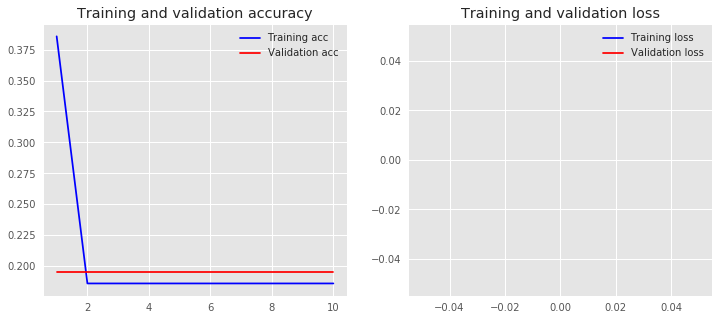

In [79]:
##history of our first model
plot_history(history)

We can see that we have trained our model for too long since the training set reached ok accuracy. A good way to see when the model starts overfitting is when the loss of the validation data starts rising again. This tends to be a good point to stop the model. You can see this around XXXXX epochs in this training.

Word Embeddings using Keras

This method represents words as dense word vectors (also called word embeddings) which are trained unlike the one-hot encoding which are hardcoded. This means that the word embeddings collect more information into fewer dimensions. Word embeddings do not understand the text as a human would, but map the statistical structure of the language used in the corpus. Their aim is to map semantic meaning into a geometric space. This geometric space is then called the embedding space.

This would map semantically similar words close on the embedding space like numbers or colors. If the embedding captures the relationship between words well, things like vector arithmetic should become possible. A famous example in this field of study is the ability to map King - Man + Woman = Queen.

How can we get such a word embedding? we have two options for this. One way is to train word embeddings during the training of neural network. The other way is by using pretrained word embeddings which can directly use in model. There we have the option to either leave these word embeddings unchanged during training or you train them also.


In [83]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_x)

X_train = tokenizer.texts_to_sequences(train_x)
X_test = tokenizer.texts_to_sequences(test_x)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

One problem that we have is that each text sequence has in most cases different length of words. To counter this, you can use pad_sequence() which simply pads the sequence of words with zeros. By default, it prepends zeros but we want to append them. Typically it does not matter whether you prepend or append zeros.

In [84]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[0, :])

[  14 2192   18    1   73   13   10   16    9    7  137    2  309   13
    2  152   22   13  274  884    4  415    6   62 1174   24   49 1386
   83   30  136    3   83  161    6   46   10   19   99   26   83  160
  461 1285    7  327   21    3   26    2  152   69   10  279    8   59
   42    2   41  258  861  226    9   37    4  110   10  115   61  203
   61    2   41    6  271   13    2  145   11 1386   83   30  136    3
   83  161    6   46   10   19   99   26   83  160  461 1285    7  327
   21    3]


In [85]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(6, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           10961950  
_________________________________________________________________
flatten_1 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                50010     
_________________________________________________________________
dense_16 (Dense)             (None, 6)                 66        
Total params: 11,012,026
Trainable params: 11,012,026
Non-trainable params: 0
_________________________________________________________________


In [88]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=128)


Train on 59800 samples, validate on 11605 samples
Epoch 1/10
59800/59800 [==============================] - 47s 786us/step - loss: 0.7042 - acc: 0.7639 - val_loss: 0.8182 - val_acc: 0.7306
Epoch 2/10
59800/59800 [==============================] - 47s 787us/step - loss: 0.5601 - acc: 0.8137 - val_loss: 0.8856 - val_acc: 0.7154
Epoch 3/10
59800/59800 [==============================] - 48s 808us/step - loss: 0.4109 - acc: 0.8674 - val_loss: 0.9716 - val_acc: 0.7062
Epoch 4/10
59800/59800 [==============================] - 48s 809us/step - loss: 0.2744 - acc: 0.9180 - val_loss: 1.1038 - val_acc: 0.6919
Epoch 5/10
59800/59800 [==============================] - 48s 803us/step - loss: 0.1768 - acc: 0.9530 - val_loss: 1.2448 - val_acc: 0.6848
Epoch 6/10
59800/59800 [==============================] - 48s 805us/step - loss: 0.1165 - acc: 0.9700 - val_loss: 1.3851 - val_acc: 0.6795
Epoch 7/10
59800/59800 [==============================] - 48s 803us/step - loss: 0.0829 - acc: 0.9781 - val_loss: 1.

In [89]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)


Training Accuracy: 0.9798
Testing Accuracy:  0.6679


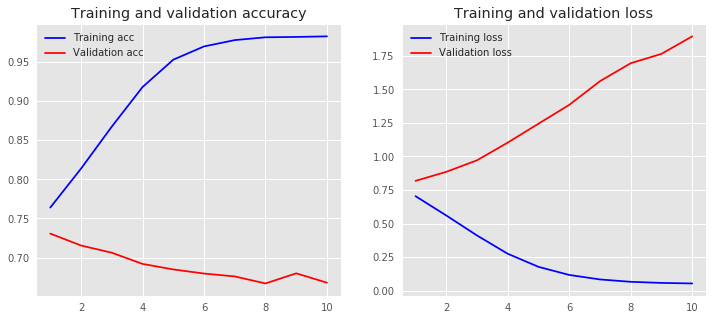

In [90]:
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Using Pretrained Word Embeddings

An alternative is to use a precomputed embedding space that utilizes a much larger corpus. It is possible to precompute word embeddings by simply training them on a large corpus of text. Among the most popular methods are Word2Vec developed by Google and GloVe (Global Vectors for Word Representation) developed by the Stanford NLP Group.

Word2Vec achieves this by employing neural networks and GloVe achieves this with a co-occurrence matrix and by using matrix factorization. In both cases you are dealing with dimensionality reduction, but Word2Vec is more accurate and GloVe is faster to compute.

In [104]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath,'r', errors = 'ignore', encoding='utf8') as f:
        for line in f:
            word, *vector = line.split(' ')
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.asarray(
                    vector, dtype='float32')[:embedding_dim]

    return embedding_matrix

In [105]:
>>> embedding_dim = 50
>>> embedding_matrix = create_embedding_matrix('glove.840B.300d.txt',tokenizer.word_index, embedding_dim)

Now we are ready to use the embedding matrix in training. Let’s use the previous network with global max pooling and see if we can improve this model. When we use pretrained word embeddings we have the choice to either allow the embedding to be updated during training or only use the resulting embedding vectors as they are.

First, let’s have a quick look how many of the embedding vectors are nonzero:

In [106]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

0.46523200707903245

In [107]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(6, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 50)           10961950  
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 50)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_20 (Dense)             (None, 6)                 66        
Total params: 10,962,526
Trainable params: 10,962,526
Non-trainable params: 0
_________________________________________________________________


In [108]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=256)


Train on 59800 samples, validate on 11605 samples
Epoch 1/10
59800/59800 [==============================] - 19s 326us/step - loss: 1.6449 - acc: 0.3115 - val_loss: 1.4403 - val_acc: 0.3980
Epoch 2/10
59800/59800 [==============================] - 18s 304us/step - loss: 1.2946 - acc: 0.4805 - val_loss: 1.0427 - val_acc: 0.6503
Epoch 3/10
59800/59800 [==============================] - 18s 305us/step - loss: 0.9669 - acc: 0.6702 - val_loss: 0.9175 - val_acc: 0.6895
Epoch 4/10
59800/59800 [==============================] - 18s 303us/step - loss: 0.8938 - acc: 0.6968 - val_loss: 0.8799 - val_acc: 0.7052
Epoch 5/10
59800/59800 [==============================] - 18s 302us/step - loss: 0.8492 - acc: 0.7123 - val_loss: 0.8541 - val_acc: 0.7142
Epoch 6/10
59800/59800 [==============================] - 18s 300us/step - loss: 0.8162 - acc: 0.7243 - val_loss: 0.8419 - val_acc: 0.7193
Epoch 7/10
59800/59800 [==============================] - 19s 321us/step - loss: 0.7891 - acc: 0.7342 - val_loss: 0.

In [109]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)


Training Accuracy: 0.7634
Testing Accuracy:  0.7220


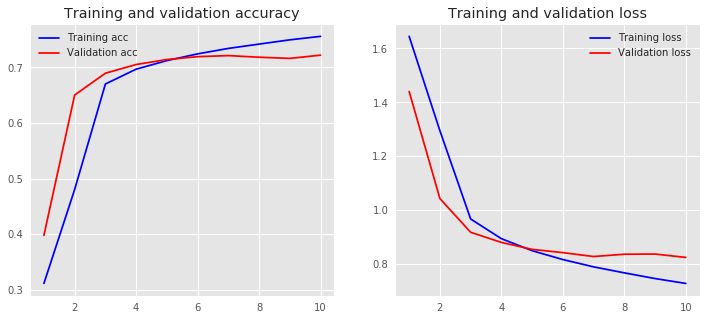

In [110]:
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

We see that it is effective to allow the embeddings to be trained. When dealing with large training sets it can boost the training process to be much faster than without. In our case it seemed to help but not by much. This does not have to be because of pretrained word embeddings.

Now it is time to focus on a more advanced neural network model to see if it is possible to boost the model and give it the leading edge over the previous models.

__Convolutional neural networks__
(called convnets)

They have revolutionized image classification and computer vision by being able to extract features from images and using them in neural networks. The properties that made them useful in image processing makes them also handy for sequence processing. You can imagine a CNN as a specialized neural network that is able to detect specific patterns.

A CNN has hidden layers which are called convolutional layers. When we think of images, a computer has to deal with a two dimensional matrix of numbers and therefore we need some way to detect features in this matrix. These convolutional layers are able to detect edges, corners and other kinds of textures which makes them such a special tool. The convolutional layer consists of multiple filters which are slid across the image and are able to detect specific features.

This is the very core of the technique, the mathematical process of convolution. With each convolutional layer the network is able to detect more complex patterns. When we are working with sequential data, like text, you work with one dimensional convolutions, but the idea and the application stays the same. You still want to pick up on patterns in the sequence which become more complex with each added convolutional layer.

In [117]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           c)
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(6, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 50)           10961950  
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 96, 128)           32128     
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 128)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_24 (Dense)             (None, 6)                 66        
Total params: 10,995,434
Trainable params: 10,995,434
Non-trainable params: 0
_________________________________________________________________


In [118]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=128)


Train on 59800 samples, validate on 11605 samples
Epoch 1/10
59800/59800 [==============================] - 40s 669us/step - loss: 1.3341 - acc: 0.4246 - val_loss: 0.9466 - val_acc: 0.6955
Epoch 2/10
59800/59800 [==============================] - 38s 636us/step - loss: 0.8727 - acc: 0.7125 - val_loss: 0.8259 - val_acc: 0.7290
Epoch 3/10
59800/59800 [==============================] - 38s 637us/step - loss: 0.7473 - acc: 0.7544 - val_loss: 0.7928 - val_acc: 0.7424
Epoch 4/10
59800/59800 [==============================] - 39s 644us/step - loss: 0.6628 - acc: 0.7815 - val_loss: 0.7997 - val_acc: 0.7382
Epoch 5/10
59800/59800 [==============================] - 38s 640us/step - loss: 0.5918 - acc: 0.8052 - val_loss: 0.8030 - val_acc: 0.7424
Epoch 6/10
59800/59800 [==============================] - 38s 639us/step - loss: 0.5196 - acc: 0.8321 - val_loss: 0.8681 - val_acc: 0.7302
Epoch 7/10
59800/59800 [==============================] - 38s 640us/step - loss: 0.4512 - acc: 0.8561 - val_loss: 0.

In [119]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)


Training Accuracy: 0.9458
Testing Accuracy:  0.7127


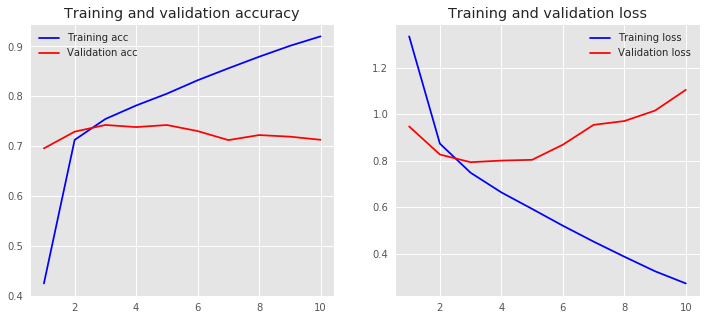

In [120]:
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

We can see that 75% accuracy seems to be really really tough hurdle to overcome with this data set and a CNN might not be well equipped. The reason for such a plateau might be that:

    - There are not enough training samples, we could find very few lyrics
    - The data we have does not generalize well, afterall we are dealing with lyrics
    - Missing focus on tweaking the hyperparameters, we will do this next

CNNs work best with really large training sets where they are able to find generalizations where a simple model like logistic regression won’t be able.

__Hyperparameters Tuning__

One crucial steps of deep learning and working with neural networks is hyperparameter optimization.

As we saw in the models that we have used so far, even with simpler ones, we had a large number of parameters to tweak and choose from. Those parameters are called hyperparameters. This is the most time consuming part of machine learning and sadly there are no one-size-fits-all solutions ready.

One popular method for hyperparameter optimization is grid search. What this method does is it takes lists of parameters and it runs the model with each parameter combination that it can find. It is the most thorough way but also the __most computationally heavy way__ to do this. Another common way, random search, which we will try -- simply takes random combinations of parameters.

In order to apply random search with Keras, we will need to use the KerasClassifier which serves as a wrapper for the scikit-learn API. With this wrapper we are able to use the various tools available with scikit-learn like cross-validation. The class that we need is __`RandomizedSearchCV`__ which implements random search with cross-validation. __Cross-validation__ is a way to validate the model and take the whole data set and separate it into multiple testing and training data sets.

There are various types of __cross-validation__. One type is the k-fold cross-validation -- the data set is partitioned into k equal sized sets where one set is used for testing and the rest of the partitions are used for training. This enables us to run k different runs, where each partition is once used as a testing set. So, the higher k is the more accurate the model evaluation is, but the smaller each testing set is.

First step for __`KerasClassifier`__ is to have a function that creates a Keras model. We will use the previous model, but we will allow various parameters to be set for the hyperparameter optimization:

In [129]:
def create_model(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen,trainable = True))
    model.add(layers.Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(6, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

We want to define the parameter grid that we want to use in training. This consists of a dictionary with each parameters named as in the previous function. The number of spaces on the grid is 3 * 3 * 1 * 1 * 1, where each of those numbers is the number of different choices for a given parameter.

We can see how this could get computationally expensive very quickly, but luckily both grid search and random search are embarrassingly parallel, and the classes come with an n_jobs parameter that lets us test grid spaces in parallel. The parameter grid is initialized with the following dictionary:

In [124]:
param_grid = dict(num_filters=[32, 64, 128],
                  kernel_size=[3, 5, 7],
                  vocab_size=[5000], 
                  embedding_dim=[50],
                  maxlen=[100])

In [128]:
X_train.shape  , y_train.shape

((59800, 100), (59800, 6))

In [132]:
train_x.shape, val_x.shape, test_x.shape, train_y.shape, val_y.shape, test_y.shape

((59800,), (5200,), (11605,), (59800,), (5200,), (11605,))

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

# Main settings
epochs = 15
embedding_dim = 100
maxlen = 100
output_file = 'output.txt'



# Parameter grid for grid search
param_grid = dict(num_filters=[32, 64, 128],
                  kernel_size=[3, 5, 7],
                  vocab_size=[vocab_size],
                  embedding_dim=[embedding_dim],
                  maxlen=[maxlen])
model = KerasClassifier(build_fn=create_model,
                        epochs=epochs, batch_size=128,
                        verbose=True)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                          cv=4, verbose=1, n_iter=5)
grid_result = grid.fit(X_train, train_y)

# Evaluate testing set
test_accuracy = grid.score(X_test, test_y)

# Save and evaluate results
with open(output_file, 'a') as f:
    s = ('Running {} data set\nBest Accuracy : '
         '{:.4f}\n{}\nTest Accuracy : {:.4f}\n\n')
    output_string = s.format(
        source,
        grid_result.best_score_,
        grid_result.best_params_,
        test_accuracy)

    print(output_string)
    f.write(output_string)

Interesting! For some reason the testing accuracy is higher than the training accuracy which might be because there is a large variance in the scores during cross-validation. We can see that we were still not able to break much through the 80% point, which seems to be a limit for this data with its given size. Remember that we have a small data set and convolutional neural networks tend to perform the best with large data sets.

Conclusion

we have gone from a bag-of-words model with logistic regression to increasingly more advanced methods leading to convolutional neural networks. We used word embeddings, they were very useful, and also how to use pretrained word embeddings for training. We have also learned how to work with neural networks and how to use hyperparameter optimization to squeeze more performance out of the model.

One big topic which we have not covered here left for another time is recurrent neural networks, more specifically LSTM and GRU. Those are other powerful and popular tools to work with sequential data like text or time series. Other interesting developments are currently in neural networks that employ attention which are under active research and seem to be a promising next step since LSTM tend to be heavy on the computation.

We will now summarize our understanding in the accompanying research paper.


<h5><center> Summary of text vectorization and embedding approaches.</center></h5>
 
|Feature Engineering|Implementation|Training time (seconds)|Comments|
|----- |---- |----|-----|
|Word2Vec|Run time training   |5 min|sklearn|
|BERT|Pre trained|30 min| Google|
|Glove|extract embeddings|9 min|Stanford NLP Group|



<h5 align="center">Summary of NLP approaches & performance</h5>
 
|Algorithm|Feature Engineering|Training time (seconds)|Test data accuracy|Comments|
|---- |---- |----|----|----|
|Naive  bayes| word2vec|4 sec|0.44|sklearn implementation|
|Decision Tree|word2Vec|72 sec|0.40|sklearn implementation|
|Multi layer perceptron|word2Vec|442 sec|0.45|sklearn Implementation|
|Random Forest|Word2Vec|97 sec|0.48|sklearn implementation|
|Simple CNN| word2Vec|360 sec|0.55|Keras Implementation|
|BERT Classifier|BERT|1800 sec |0.47|Google Open Source|
|Keras 10 layer NN|Keras word embedding|1800 sec|0.66|Keras Implementation|
|Keras 10 layer NN|pretrained Glove embedding|1500 sec|0.72|Keras Implementation|
|CNN 10 layer NN|pretrained Glove embedding|1200 sec|0.71|Keras Implementation|





# 5. Application of New Concepts


Throughout the project we sought to implement a scalable solution with consideration to the problem context.  BERT’s key technical innovation is applying the bidirectional training of Transformer, a popular attention model, to language modelling. This is in contrast to previous efforts which looked at a text sequence either from left to right or combined left-to-right and right-to-left training. The BERT paper’s results show that a language model which is bidirectionally trained can have a deeper sense of language context and flow than single-direction language models.


# 6. References

__[FULL LIST WILL BE UPDATED AS WE COMPLETE PROJECT]__

(1) [The State of Streaming Music Services](https://www.pcmag.com/roundup/260966/the-best-online-music-streaming-services)

(2) [Spotify - For the record](https://newsroom.spotify.com/company-info/)

(3) [Understanding AUC ROC](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

(4) [NLP: The Essential Guide to Neuro-Linguistic Programming](http://astore.amazon.com/glnltr08-20/detail/0062083619)

